In [126]:
import pandas as pd

In [127]:
import numpy as np

In [128]:
import matplotlib.pyplot as plt

Read csv file

In [129]:
df0 = pd.read_csv("blockfi_transactions.csv")

In [130]:
#rename column name
df0= df0.rename(columns={"Transaction Type":"Type", "Confirmed At":"Date","Cryptocurrency":"Token"})

In [131]:
#convert date time
df0["Date"] = pd.to_datetime(df0["Date"])

In [132]:
df0.head(6)

,Token,Amount,Type,Date
0,USDC,-2.000000,Trade,2021-04-05 00:47:30
1,LTC,0.009811,Trade,2021-04-05 00:47:30
2,USDC,-2.000000,Trade,2021-04-04 21:59:30
3,USDT,1.979777,Trade,2021-04-04 21:59:30
4,BUSD,-2.000000,Trade,2021-04-04 21:44:31
5,LINK,0.064683,Trade,2021-04-04 21:44:31


Save csv file

In [133]:
#df0.info()

In [134]:
df0.to_csv('dfblockfi.csv')

In [135]:
df0[['Token','Type','Amount']].groupby(by='Token').sum()

,Amount
Token,
BTC,0.010005
BUSD,104.776499
ETH,0.194681
GUSD,35.000000
LINK,0.514719
LTC,0.786868
PAX,576.360658
PAXG,0.077425
USDC,98.001054


In [136]:
#group stablecoins
#df1=  df0[['Token','Type','Amount']].query("Token != 'BTC' and Token!= 'ETH' and Token!='LINK' and Token!='LTC' and Token!='PAXG'").groupby(by='Token').sum()

In [137]:
print(df1.sum()) #sum stablecoins

Amount    846.334552
dtype: float64


In [138]:
#interest group stablecoins
df2=  df0[['Date','Token','Type','Amount']].query("Token != 'BTC' and Token!= 'ETH' and Token!='LINK' and Token!='LTC' and Token!='PAXG' and Type=='Interest Payment'")

In [139]:
#df2

Array

In [140]:
x1 = np.sort(df2['Date']) #riordina

In [141]:
y1 = np.sort(df2['Amount']) #riordina

In [142]:
np.sum(y1) #somma interessi

74.2421439

In [143]:
y2 = np.cumsum(y1)

In [144]:
np.mean(df2['Amount'])  #media

4.64013399375

In [145]:
np.median(df2['Amount']) #mediana

4.61370866

Plot

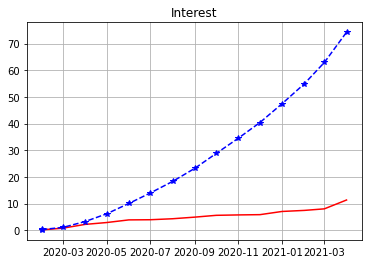

In [146]:
plt.plot(x1, y1,'r',x1, y2,'b--*',) #day interest
plt.title("Interest")
plt.grid()
plt.show()

In [147]:
#save csv.file dataframe